# Analisis Sentimen dalam Evaluasi Ulasan Pelanggan terhadap 5 Brand Elektronik Lokal Indonesia di Tokopedia

### 1. Cosmos
### 2. Maspion
3

In [18]:
import pandas as pd

# Atur lebar maksimum kolom
pd.set_option('display.max_colwidth', None)

df1_ = pd.read_csv('polytron.csv')
df2_ = pd.read_csv('sanken.csv')
df3_ = pd.read_csv('cosmos.csv')
df4_ = pd.read_csv('maspion.csv')
df5_ = pd.read_csv('miyako.csv')

In [19]:
# Gabungkan DataFrame tanpa indeks
data = pd.concat([df1_, df2_, df3_, df4_, df5_], ignore_index=True)

# Simpan DataFrame gabungan ke file CSV
data.to_csv('combined.csv', index=False)

# Preprocessing

## Data Cleaning 

In [20]:
data = pd.read_csv('combined.csv')
data.head()

,Nama Pengguna,Produk,Rating,Ulasan,Tanggal
0,h***O,POLYTRON Mesin Cuci 2 Tabung Giant Series Hijab 8 KG PWM 8076,bintang 5,mantap,Hari ini
1,hapid,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,"barang original, penerimaan lumbayan cepat.",Hari ini
2,a***l,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,"very good respond, normal delivery, good quality",Hari ini
3,T***a,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,"barang OK, sistem pengirimannya yg perlu di perhatikan",Hari ini
4,A***a,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,sudah sampai dan packing aman dan cepat . ongkir nya juga gratis. mantap 👍👍👍👍,Hari ini


In [41]:
data[data['Produk']=='POLYTRON Mesin Cuci 2 Tabung Primadona Giant 9 Kg PWM 9072'].head(1)

,Nama Pengguna,Produk,Rating,Ulasan,Tanggal
28,Gilang,POLYTRON Mesin Cuci 2 Tabung Primadona Giant 9 Kg PWM 9072,bintang 5,Bisa muat banyak Barangnya original 👍 Gampang dipakai Hemat listrik ⚡ Desainnya elegan ✨ Packaging aman 🙏,3 hari lalu


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nama Pengguna  2461 non-null   object
 1   Produk         2461 non-null   object
 2   Rating         2461 non-null   object
 3   Ulasan         2461 non-null   object
 4   Tanggal        2461 non-null   object
dtypes: object(5)
memory usage: 96.3+ KB


In [402]:
data.isnull().sum()

Nama Pengguna    0
Produk           0
Rating           0
Ulasan           0
Tanggal          0
dtype: int64

In [403]:
data.duplicated().sum()

154

In [406]:
data = data.drop_duplicates()

In [407]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2307 entries, 0 to 2380
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nama Pengguna  2307 non-null   object
 1   Produk         2307 non-null   object
 2   Rating         2307 non-null   object
 3   Ulasan         2307 non-null   object
 4   Tanggal        2307 non-null   object
dtypes: object(5)
memory usage: 108.1+ KB


In [408]:
data.duplicated().sum()

0

### Kolom penting

In [419]:
df = data[['Tanggal', 'Produk', 'Rating', 'Ulasan']]

In [420]:
df.head()

,Tanggal,Produk,Rating,Ulasan
0,Hari ini,POLYTRON Mesin Cuci 2 Tabung Giant Series Hijab 8 KG PWM 8076,bintang 5,mantap
1,Hari ini,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,"barang original, penerimaan lumbayan cepat."
2,Hari ini,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,"very good respond, normal delivery, good quality"
3,Hari ini,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,"barang OK, sistem pengirimannya yg perlu di perhatikan"
4,Hari ini,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,sudah sampai dan packing aman dan cepat . ongkir nya juga gratis. mantap 👍👍👍👍


## Data Labeling

In [421]:
label = []
for index, row in df.iterrows():
  if row["Rating"] == 'bintang 1' or row["Rating"] == 'bintang 2' or row["Rating"] == 'bintang 3':
    label.append(0)
  else :
    label.append(1)

df["Label"] = label

In [422]:
df.head()

,Tanggal,Produk,Rating,Ulasan,Label
0,Hari ini,POLYTRON Mesin Cuci 2 Tabung Giant Series Hijab 8 KG PWM 8076,bintang 5,mantap,1
1,Hari ini,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,"barang original, penerimaan lumbayan cepat.",1
2,Hari ini,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,"very good respond, normal delivery, good quality",1
3,Hari ini,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,"barang OK, sistem pengirimannya yg perlu di perhatikan",1
4,Hari ini,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,sudah sampai dan packing aman dan cepat . ongkir nya juga gratis. mantap 👍👍👍👍,1


In [423]:
df['Label'].value_counts()

1    2086
0     221
Name: Label, dtype: int64

In [424]:
df['Rating'].value_counts()

bintang 5    1940
bintang 4     146
bintang 1     101
bintang 3      87
bintang 2      33
Name: Rating, dtype: int64

## Case Folding

In [425]:
df['Ulasan'] = df['Ulasan'].str.lower()
df.head()

,Tanggal,Produk,Rating,Ulasan,Label
0,Hari ini,POLYTRON Mesin Cuci 2 Tabung Giant Series Hijab 8 KG PWM 8076,bintang 5,mantap,1
1,Hari ini,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,"barang original, penerimaan lumbayan cepat.",1
2,Hari ini,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,"very good respond, normal delivery, good quality",1
3,Hari ini,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,"barang ok, sistem pengirimannya yg perlu di perhatikan",1
4,Hari ini,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,sudah sampai dan packing aman dan cepat . ongkir nya juga gratis. mantap 👍👍👍👍,1


### setelah case folding sebelum hapus simbol kek tanda titik, koma, -, petik diberi spasi terlebih dahulu takut ada kata yang tiba tiba menyambung tanpa spasi

In [426]:
df.to_csv('case folding.csv', index=False)

In [22]:
df = pd.read_csv('case folding.csv')

In [23]:
df.head()

,Tanggal,Produk,Rating,Ulasan,Label
0,Hari ini,POLYTRON Mesin Cuci 2 Tabung Giant Series Hijab 8 KG PWM 8076,bintang 5,mantap,1
1,Hari ini,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,"barang original, penerimaan lumbayan cepat.",1
2,Hari ini,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,"very good respond, normal delivery, good quality",1
3,Hari ini,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,"barang ok, sistem pengirimannya yg perlu di perhatikan",1
4,Hari ini,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,sudah sampai dan packing aman dan cepat . ongkir nya juga gratis. mantap 👍👍👍👍,1


sudah case folding lanjut hapus simbol-simbol

## Remove Punctuation

In [24]:
# Case Folding dan Cleaning
import re
import unicodedata

def Remove_Punctuation(text):
    # Menghapus link
    text = re.sub(r'http\S+', '', text)
    
    # Mencari tanda koma yang tidak diikuti oleh spasi dan menambahkan spasi setelahnya
    fixed_text = re.sub(r',(?!\s)', ', ', text)
    
    # Menghapus karakter non-ASCII dan menggantinya dengan spasi
    text = re.sub(r'[^\x00-\x7F]+', ' ', fixed_text)
    
    # Menghapus tanda baca
    text = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', text)
    
    # Menghapus angka
    text = re.sub(r'\d', '', text)
    
    # Menghapus spasi yang lebih dari satu
    text = re.sub('\s+', ' ', text)

    # Menghapus karakter yang tidak penting
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    
    # Menghapus baris baru (enter) dengan spasi
    text = re.sub('\n', ' ', text)
    
    # Menghapus username dan hashtag
    text = re.sub('(@\w+|#\w+)', '', text)
    
    # Menghapus huruf tunggal
    text = re.sub(r'\b\w\b', '', text)
    
    return text

In [25]:
df['Cleaning'] = df['Ulasan'].apply(Remove_Punctuation)

In [26]:
df.head()

,Tanggal,Produk,Rating,Ulasan,Label,Cleaning
0,Hari ini,POLYTRON Mesin Cuci 2 Tabung Giant Series Hijab 8 KG PWM 8076,bintang 5,mantap,1,mantap
1,Hari ini,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,"barang original, penerimaan lumbayan cepat.",1,barang original penerimaan lumbayan cepat
2,Hari ini,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,"very good respond, normal delivery, good quality",1,very good respond normal delivery good quality
3,Hari ini,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,"barang ok, sistem pengirimannya yg perlu di perhatikan",1,barang ok sistem pengirimannya yg perlu di perhatikan
4,Hari ini,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,sudah sampai dan packing aman dan cepat . ongkir nya juga gratis. mantap 👍👍👍👍,1,sudah sampai dan packing aman dan cepat ongkir nya juga gratis mantap


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307 entries, 0 to 2306
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tanggal   2307 non-null   object
 1   Produk    2307 non-null   object
 2   Rating    2307 non-null   object
 3   Ulasan    2307 non-null   object
 4   Label     2307 non-null   int64 
 5   Cleaning  2307 non-null   object
dtypes: int64(1), object(5)
memory usage: 108.3+ KB


In [27]:
df.isna().sum()

Tanggal     0
Produk      0
Rating      0
Ulasan      0
Label       0
Cleaning    0
dtype: int64

#### setelah hapus simbol-simbol seharusnya cek lagi lewatt excel untuk hapus spasi, trim

In [436]:
df.to_csv('hapus simbol.csv', index=False)

In [28]:
df = pd.read_csv('hapus simbol.csv')

#### Benar ternyata setelah hapus ismbol perlu di TRIM lagi, jadi pake data hapus simbol jika pengen mulai dari awal lagi

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307 entries, 0 to 2306
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tanggal   2307 non-null   object
 1   Produk    2307 non-null   object
 2   Rating    2307 non-null   object
 3   Ulasan    2307 non-null   object
 4   Label     2307 non-null   int64 
 5   Cleaning  2289 non-null   object
dtypes: int64(1), object(5)
memory usage: 108.3+ KB


In [30]:
df.isnull().sum()

Tanggal      0
Produk       0
Rating       0
Ulasan       0
Label        0
Cleaning    18
dtype: int64

In [31]:
df = df.dropna()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2289 entries, 0 to 2306
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tanggal   2289 non-null   object
 1   Produk    2289 non-null   object
 2   Rating    2289 non-null   object
 3   Ulasan    2289 non-null   object
 4   Label     2289 non-null   int64 
 5   Cleaning  2289 non-null   object
dtypes: int64(1), object(5)
memory usage: 125.2+ KB


In [33]:
df1 = df[['Tanggal', 'Produk', 'Rating', 'Label', 'Ulasan', 'Cleaning']] # pakai ini buat jaga jaga

In [34]:
df1.head()

,Tanggal,Produk,Rating,Label,Ulasan,Cleaning
0,Hari ini,POLYTRON Mesin Cuci 2 Tabung Giant Series Hijab 8 KG PWM 8076,bintang 5,1,mantap,mantap
1,Hari ini,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,1,"barang original, penerimaan lumbayan cepat.",barang original penerimaan lumbayan cepat
2,Hari ini,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,1,"very good respond, normal delivery, good quality",very good respond normal delivery good quality
3,Hari ini,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,1,"barang ok, sistem pengirimannya yg perlu di perhatikan",barang ok sistem pengirimannya yg perlu di perhatikan
4,Hari ini,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,1,sudah sampai dan packing aman dan cepat . ongkir nya juga gratis. mantap 👍👍👍👍,sudah sampai dan packing aman dan cepat ongkir nya juga gratis mantap


## tokenisasi

In [35]:
def split_word(teks):
    list_teks = []
    for txt in teks.split(" "):
        list_teks.append(txt)
    return list_teks

In [39]:
df1['Tokenizing'] = df1['Cleaning'].apply(split_word)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8116\1236822912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tokenizing'] = df1['Cleaning'].apply(split_word)


,Tanggal,Produk,Rating,Label,Ulasan,Cleaning,Tokenizing
28,3 hari lalu,POLYTRON Mesin Cuci 2 Tabung Primadona Giant 9 Kg PWM 9072,bintang 5,1,bisa muat banyak barangnya original 👍 gampang dipakai hemat listrik ⚡ desainnya elegan ✨ packaging aman 🙏,bisa muat banyak barangnya original gampang dipakai hemat listrik desainnya elegan packaging aman,"[bisa, muat, banyak, barangnya, original, gampang, dipakai, hemat, listrik, desainnya, elegan, packaging, aman]"


In [37]:
df.isna().sum()

Tanggal     0
Produk      0
Rating      0
Ulasan      0
Label       0
Cleaning    0
dtype: int64

# Normalisasi

In [452]:
slang_dictionary = pd.read_csv('colloquial-indonesian-lexicon.csv')
slang_dict = pd.Series(slang_dictionary['formal'].values, index=slang_dictionary['slang']).to_dict()

In [453]:
def normalisasi(text):
    for word in text:
        if word in slang_dict.keys():
            text = [s.replace(word, slang_dict[word]) for s in text]
    return text

In [454]:
df1['Normalisasi'] = df1['Tokenizing'].apply(normalisasi)
df1.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4208\2685485836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Normalisasi'] = df1['Tokenizing'].apply(normalisasi)


,Tanggal,Produk,Rating,Label,Ulasan,Cleaning,Tokenizing,Normalisasi
0,Hari ini,POLYTRON Mesin Cuci 2 Tabung Giant Series Hijab 8 KG PWM 8076,bintang 5,1,mantap,mantap,[mantap],[mantap]
1,Hari ini,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,1,"barang original, penerimaan lumbayan cepat.",barang original penerimaan lumbayan cepat,"[barang, original, penerimaan, lumbayan, cepat]","[barang, original, penerimaan, lumbayan, cepat]"
2,Hari ini,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,1,"very good respond, normal delivery, good quality",very good respond normal delivery good quality,"[very, good, respond, normal, delivery, good, quality]","[very, good, respond, normal, delivery, good, quality]"
3,Hari ini,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,1,"barang ok, sistem pengirimannya yg perlu di perhatikan",barang ok sistem pengirimannya yg perlu di perhatikan,"[barang, ok, sistem, pengirimannya, yg, perlu, di, perhatikan]","[barang, ok, sistem, pengirimannya, yang, perlu, di, perhatikan]"
4,Hari ini,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,1,sudah sampai dan packing aman dan cepat . ongkir nya juga gratis. mantap 👍👍👍👍,sudah sampai dan packing aman dan cepat ongkir nya juga gratis mantap,"[sudah, sampai, dan, packing, aman, dan, cepat, ongkir, nya, juga, gratis, mantap]","[sudah, sampai, dan, packing, aman, dan, cepat, ongkir, nya, juga, gratis, mantap]"


In [455]:
df2 = df1 ## buat jaga-jaga

gunakan df2

### sampai sini kita sudah melakukan, cleaning hapus duplkat, nambah spasi setelah simbol . , ' " , kemudian case folding, apus simbol (remove punctuation), download, cek Trim biasanya abis apus simbol ada null, kemudian Tokenisasi, Normalisasi, kemudian Stopword, dan hapus bahasa inggris

# stopwords dan kata bahasa inggris

In [456]:
import nltk
from nltk.corpus import stopwords

# Unduh daftar stopwords untuk bahasa Indonesia 
nltk.download('stopwords')

# Salin daftar stopwords bawaan NLTK untuk bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Tambahkan kata "tidak" dan sejenisnya ke dalam daftar stopwords
additional_words = ['gak', 'enggak', 'gk', 'tidak']
stop_words -= set(additional_words)

# Fungsi untuk menghapus stopwords dari sebuah kalimat
def remove_stopwords(sentence):
    words = sentence
    # Hapus stopwords dari list kata-kata
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # hasil
    return filtered_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [457]:
# Menggunakan fungsi remove_stopwords() pada kolom 'Cleaning'
df2['Stopword'] = df2['Normalisasi'].apply(lambda x: remove_stopwords(x))

df2.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4208\2118931782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Stopword'] = df2['Normalisasi'].apply(lambda x: remove_stopwords(x))


,Tanggal,Produk,Rating,Label,Ulasan,Cleaning,Tokenizing,Normalisasi,Stopword
0,Hari ini,POLYTRON Mesin Cuci 2 Tabung Giant Series Hijab 8 KG PWM 8076,bintang 5,1,mantap,mantap,[mantap],[mantap],[mantap]
1,Hari ini,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,1,"barang original, penerimaan lumbayan cepat.",barang original penerimaan lumbayan cepat,"[barang, original, penerimaan, lumbayan, cepat]","[barang, original, penerimaan, lumbayan, cepat]","[barang, original, penerimaan, lumbayan, cepat]"
2,Hari ini,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,1,"very good respond, normal delivery, good quality",very good respond normal delivery good quality,"[very, good, respond, normal, delivery, good, quality]","[very, good, respond, normal, delivery, good, quality]","[very, good, respond, normal, delivery, good, quality]"
3,Hari ini,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,1,"barang ok, sistem pengirimannya yg perlu di perhatikan",barang ok sistem pengirimannya yg perlu di perhatikan,"[barang, ok, sistem, pengirimannya, yg, perlu, di, perhatikan]","[barang, ok, sistem, pengirimannya, yang, perlu, di, perhatikan]","[barang, ok, sistem, pengirimannya, perhatikan]"
4,Hari ini,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,1,sudah sampai dan packing aman dan cepat . ongkir nya juga gratis. mantap 👍👍👍👍,sudah sampai dan packing aman dan cepat ongkir nya juga gratis mantap,"[sudah, sampai, dan, packing, aman, dan, cepat, ongkir, nya, juga, gratis, mantap]","[sudah, sampai, dan, packing, aman, dan, cepat, ongkir, nya, juga, gratis, mantap]","[packing, aman, cepat, ongkir, nya, gratis, mantap]"


In [458]:
import nltk
from nltk.corpus import words

# Download kamus kata-kata bahasa Inggris dari nltk
nltk.download('words')

# Fungsi untuk menghapus kata-kata bahasa Inggris dari sebuah teks
def remove_english(text):
    # Memeriksa setiap kata dalam teks
    filtered_text = [word for word in text if word.lower() not in words.words()]
    return filtered_text

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [459]:
df2['Stopword'] = df2['Stopword'].apply(lambda x: remove_english(x))

df2.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4208\3261056402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Stopword'] = df2['Stopword'].apply(lambda x: remove_english(x))


,Tanggal,Produk,Rating,Label,Ulasan,Cleaning,Tokenizing,Normalisasi,Stopword
0,Hari ini,POLYTRON Mesin Cuci 2 Tabung Giant Series Hijab 8 KG PWM 8076,bintang 5,1,mantap,mantap,[mantap],[mantap],[mantap]
1,Hari ini,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,1,"barang original, penerimaan lumbayan cepat.",barang original penerimaan lumbayan cepat,"[barang, original, penerimaan, lumbayan, cepat]","[barang, original, penerimaan, lumbayan, cepat]","[barang, penerimaan, lumbayan, cepat]"
2,Hari ini,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,1,"very good respond, normal delivery, good quality",very good respond normal delivery good quality,"[very, good, respond, normal, delivery, good, quality]","[very, good, respond, normal, delivery, good, quality]",[]
3,Hari ini,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,1,"barang ok, sistem pengirimannya yg perlu di perhatikan",barang ok sistem pengirimannya yg perlu di perhatikan,"[barang, ok, sistem, pengirimannya, yg, perlu, di, perhatikan]","[barang, ok, sistem, pengirimannya, yang, perlu, di, perhatikan]","[barang, ok, sistem, pengirimannya, perhatikan]"
4,Hari ini,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,1,sudah sampai dan packing aman dan cepat . ongkir nya juga gratis. mantap 👍👍👍👍,sudah sampai dan packing aman dan cepat ongkir nya juga gratis mantap,"[sudah, sampai, dan, packing, aman, dan, cepat, ongkir, nya, juga, gratis, mantap]","[sudah, sampai, dan, packing, aman, dan, cepat, ongkir, nya, juga, gratis, mantap]","[packing, aman, cepat, ongkir, nya, mantap]"


# Stemming

In [466]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string, unicodedata

def stemmingText(text): 
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

In [467]:
df2['Stemming'] = df2['Stopword'].apply(stemmingText)
df2.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4208\2433099299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Stemming'] = df2['Stopword'].apply(stemmingText)


,Tanggal,Produk,Rating,Label,Ulasan,Cleaning,Tokenizing,Normalisasi,Stopword,Stemming
0,Hari ini,POLYTRON Mesin Cuci 2 Tabung Giant Series Hijab 8 KG PWM 8076,bintang 5,1,mantap,mantap,[mantap],[mantap],[mantap],[mantap]
1,Hari ini,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,1,"barang original, penerimaan lumbayan cepat.",barang original penerimaan lumbayan cepat,"[barang, original, penerimaan, lumbayan, cepat]","[barang, original, penerimaan, lumbayan, cepat]","[barang, penerimaan, lumbayan, cepat]","[barang, terima, lumbayan, cepat]"
2,Hari ini,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,1,"very good respond, normal delivery, good quality",very good respond normal delivery good quality,"[very, good, respond, normal, delivery, good, quality]","[very, good, respond, normal, delivery, good, quality]",[],[]
3,Hari ini,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,1,"barang ok, sistem pengirimannya yg perlu di perhatikan",barang ok sistem pengirimannya yg perlu di perhatikan,"[barang, ok, sistem, pengirimannya, yg, perlu, di, perhatikan]","[barang, ok, sistem, pengirimannya, yang, perlu, di, perhatikan]","[barang, ok, sistem, pengirimannya, perhatikan]","[barang, ok, sistem, kirim, perhati]"
4,Hari ini,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,1,sudah sampai dan packing aman dan cepat . ongkir nya juga gratis. mantap 👍👍👍👍,sudah sampai dan packing aman dan cepat ongkir nya juga gratis mantap,"[sudah, sampai, dan, packing, aman, dan, cepat, ongkir, nya, juga, gratis, mantap]","[sudah, sampai, dan, packing, aman, dan, cepat, ongkir, nya, juga, gratis, mantap]","[packing, aman, cepat, ongkir, nya, mantap]","[packing, aman, cepat, ongkir, nya, mantap]"


In [468]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2289 entries, 0 to 2306
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tanggal      2289 non-null   object
 1   Produk       2289 non-null   object
 2   Rating       2289 non-null   object
 3   Label        2289 non-null   int64 
 4   Ulasan       2289 non-null   object
 5   Cleaning     2289 non-null   object
 6   Tokenizing   2289 non-null   object
 7   Normalisasi  2289 non-null   object
 8   Stopword     2289 non-null   object
 9   Stemming     2289 non-null   object
dtypes: int64(1), object(9)
memory usage: 196.7+ KB


In [469]:
#satukan kembali
def satu(teks):
    text = (" ").join(teks)
    return text

df2['text'] = df2['Stemming'].apply(satu).str.findall('\w{2,}').str.join(' ').apply(split_word)
                        
#Hapus missing value
df2['text'] = df2['text'].apply(satu).drop_duplicates().apply(split_word)
df2 = df2.dropna()
df2 = df2.reset_index(drop=True)
       
#Untokenizing
df2['text'] = df2['text'].apply(satu)
df2.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4208\1129373661.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['text'] = df2['Stemming'].apply(satu).str.findall('\w{2,}').str.join(' ').apply(split_word)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4208\1129373661.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['text'] = df2['text'].apply(satu).drop_duplicates().apply(split_word)


,Tanggal,Produk,Rating,Label,Ulasan,Cleaning,Tokenizing,Normalisasi,Stopword,Stemming,text
0,Hari ini,POLYTRON Mesin Cuci 2 Tabung Giant Series Hijab 8 KG PWM 8076,bintang 5,1,mantap,mantap,[mantap],[mantap],[mantap],[mantap],mantap
1,Hari ini,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,1,"barang original, penerimaan lumbayan cepat.",barang original penerimaan lumbayan cepat,"[barang, original, penerimaan, lumbayan, cepat]","[barang, original, penerimaan, lumbayan, cepat]","[barang, penerimaan, lumbayan, cepat]","[barang, terima, lumbayan, cepat]",barang terima lumbayan cepat
2,Hari ini,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,1,"very good respond, normal delivery, good quality",very good respond normal delivery good quality,"[very, good, respond, normal, delivery, good, quality]","[very, good, respond, normal, delivery, good, quality]",[],[],
3,Hari ini,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,1,"barang ok, sistem pengirimannya yg perlu di perhatikan",barang ok sistem pengirimannya yg perlu di perhatikan,"[barang, ok, sistem, pengirimannya, yg, perlu, di, perhatikan]","[barang, ok, sistem, pengirimannya, yang, perlu, di, perhatikan]","[barang, ok, sistem, pengirimannya, perhatikan]","[barang, ok, sistem, kirim, perhati]",barang ok sistem kirim perhati
4,Hari ini,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,1,sudah sampai dan packing aman dan cepat . ongkir nya juga gratis. mantap 👍👍👍👍,sudah sampai dan packing aman dan cepat ongkir nya juga gratis mantap,"[sudah, sampai, dan, packing, aman, dan, cepat, ongkir, nya, juga, gratis, mantap]","[sudah, sampai, dan, packing, aman, dan, cepat, ongkir, nya, juga, gratis, mantap]","[packing, aman, cepat, ongkir, nya, mantap]","[packing, aman, cepat, ongkir, nya, mantap]",packing aman cepat ongkir nya mantap


## ada yang tidak terdeteksi null, padahal ada yang null, kemudian liat di excel menggunakan fungsi countblank

In [476]:
df2.to_csv('preprocessing.csv', index=False)

## sudah disi dengan kata sesuai ulasan

In [2]:
import pandas as pd

df2 = pd.read_csv('preprocessing.csv')

In [48]:
df2[df2['Ulasan']=='slow respon\nmembatalkan secara sepihak\nsemoga kena suspend dr tokopedia']

,Tanggal,Produk,Rating,Label,Ulasan,Cleaning,Tokenizing,Normalisasi,Stopword,Stemming,text
20,2 hari lalu,POLYTRON Mesin Cuci 2 Tabung Giant Series Hijab 8 KG PWM 8076,bintang 1,0,slow respon\nmembatalkan secara sepihak\nsemoga kena suspend dr tokopedia,slow respon membatalkan secara sepihak semoga kena suspend dr tokopedia,"['slow', 'respon', 'membatalkan', 'secara', 'sepihak', 'semoga', 'kena', 'suspend', 'dr', 'tokopedia']","['slow', 'respon', 'membatalkan', 'secara', 'sepihak', 'semoga', 'kena', 'suspend', 'dari', 'tokopedia']","['respon', 'membatalkan', 'semoga', 'kena', 'tokopedia']","['respon', 'batal', 'moga', 'kena', 'tokopedia']",respon batal moga kena tokopedia


In [46]:
df2.head(24)

,Tanggal,Produk,Rating,Label,Ulasan,Cleaning,Tokenizing,Normalisasi,Stopword,Stemming,text
0,Hari ini,POLYTRON Mesin Cuci 2 Tabung Giant Series Hijab 8 KG PWM 8076,bintang 5,1,mantap,mantap,['mantap'],['mantap'],['mantap'],['mantap'],mantap
1,Hari ini,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,1,"barang original, penerimaan lumbayan cepat.",barang original penerimaan lumbayan cepat,"['barang', 'original', 'penerimaan', 'lumbayan', 'cepat']","['barang', 'original', 'penerimaan', 'lumbayan', 'cepat']","['barang', 'penerimaan', 'lumbayan', 'cepat']","['barang', 'terima', 'lumbayan', 'cepat']",barang terima lumbayan cepat
2,Hari ini,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,1,"very good respond, normal delivery, good quality",very good respond normal delivery good quality,"['very', 'good', 'respond', 'normal', 'delivery', 'good', 'quality']","['very', 'good', 'respond', 'normal', 'delivery', 'good', 'quality']",[],[],sangat bagus respon baik
3,Hari ini,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,1,"barang ok, sistem pengirimannya yg perlu di perhatikan",barang ok sistem pengirimannya yg perlu di perhatikan,"['barang', 'ok', 'sistem', 'pengirimannya', 'yg', 'perlu', 'di', 'perhatikan']","['barang', 'ok', 'sistem', 'pengirimannya', 'yang', 'perlu', 'di', 'perhatikan']","['barang', 'ok', 'sistem', 'pengirimannya', 'perhatikan']","['barang', 'ok', 'sistem', 'kirim', 'perhati']",barang ok sistem kirim perhati
4,Hari ini,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,1,sudah sampai dan packing aman dan cepat . ongkir nya juga gratis. mantap 👍👍👍👍,sudah sampai dan packing aman dan cepat ongkir nya juga gratis mantap,"['sudah', 'sampai', 'dan', 'packing', 'aman', 'dan', 'cepat', 'ongkir', 'nya', 'juga', 'gratis', 'mantap']","['sudah', 'sampai', 'dan', 'packing', 'aman', 'dan', 'cepat', 'ongkir', 'nya', 'juga', 'gratis', 'mantap']","['packing', 'aman', 'cepat', 'ongkir', 'nya', 'mantap']","['packing', 'aman', 'cepat', 'ongkir', 'nya', 'mantap']",packing aman cepat ongkir nya mantap
5,Hari ini,PSR ADL11 SMART REMOTE CONTROL,bintang 1,0,"kurir hanya ada pilihan kurir toko, tetapi ternyata memakai jasa kgx. \ntgl 6 pagi order, tgl 7 status sudah diproses dan dikirim (diserahkan ke kurir kgx). \nperlu upaya kom. . .",kurir hanya ada pilihan kurir toko tetapi ternyata memakai jasa kgx tgl pagi order tgl status sudah diproses dan dikirim diserahkan ke kurir kgx perlu upaya kom,"['kurir', 'hanya', 'ada', 'pilihan', 'kurir', 'toko', 'tetapi', 'ternyata', 'memakai', 'jasa', 'kgx', 'tgl', 'pagi', 'order', 'tgl', 'status', 'sudah', 'diproses', 'dan', 'dikirim', 'diserahkan', 'ke', 'kurir', 'kgx', 'perlu', 'upaya', 'kom']","['kurir', 'hanya', 'ada', 'pilihan', 'kurir', 'toko', 'tetapi', 'ternyata', 'memakai', 'jasa', 'kgx', 'tanggal', 'pagi', 'order', 'tanggal', 'status', 'sudah', 'diproses', 'dan', 'dikirim', 'diserahkan', 'ke', 'kurir', 'kgx', 'perlu', 'upaya', 'kom']","['kurir', 'pilihan', 'kurir', 'memakai', 'jasa', 'kgx', 'tanggal', 'pagi', 'tanggal', 'diproses', 'dikirim', 'diserahkan', 'kurir', 'kgx', 'upaya', 'kom']","['kurir', 'pilih', 'kurir', 'pakai', 'jasa', 'kgx', 'tanggal', 'pagi', 'tanggal', 'proses', 'kirim', 'serah', 'kurir', 'kgx', 'upaya', 'kom']",kurir pilih kurir pakai jasa kgx tanggal pagi tanggal proses kirim serah kurir kgx upaya kom
6,1 hari lalu,POLYTRON Mesin Cuci 1 Tabung Zeromatic Laguna Hijab 8 KG PAW 8028,bintang 5,1,barang sesuai spesifikasi yg di pesan dan pengiriman cepat😉 bismillah awet barang nya,barang sesuai spesifikasi yg di pesan dan pengiriman cepat bismillah awet barang nya,"['barang', 'sesuai', 'spesifikasi', 'yg', 'di', 'pesan', 'dan', 'pengiriman', 'cepat', 'bismillah', 'awet', 'barang', 'nya']","['barang', 'sesuai', 'spesifikasi', 'yang', 'di', 'pesan', 'dan', 'pengiriman', 'cepat', 'bismillah', 'awet', 'barang', 'nya']","['barang', 'sesuai', 'spesifikasi', 'pesan', 'pengiriman', 'cepat', 'awet', 'barang', 'nya']","['barang', 'sesuai', 'spesifikasi', 'pesan', 

In [4]:
df2['Label'].value_counts()

1    1710
0     211
Name: Label, dtype: int64

In [ ]:
df2[]

In [49]:
coba = df2[['text', 'Rating', 'Label']]

# coba pelabelan dengan lexicon

In [50]:
def split_word(teks):
    list_teks = []
    for txt in teks.split(" "):
        list_teks.append(txt)
    return list_teks

import csv

lexicon_positive = dict()

with open('positive.tsv', 'r', encoding='utf-8') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    
    # Skip the header
    next(reader, None)
    
    for row in reader: 
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()

with open('negative.tsv', 'r', encoding='utf-8') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    
    # Skip the header
    next(reader, None)
    
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity = ''
    if (score >= 0):
        polarity = 'positive'
    else :
        polarity = 'negative'
    
    return score, polarity

In [51]:
hasil = coba['text'].apply(split_word).apply(sentiment_analysis_lexicon_indonesia)
hasil = list(zip(*hasil))
coba['polarity_score'] = hasil[0]
coba['polarity'] = hasil[1]
coba.polarity.value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8116\3758279846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coba['polarity_score'] = hasil[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8116\3758279846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coba['polarity'] = hasil[1]


positive    1524
negative     397
Name: polarity, dtype: int64

In [52]:
df2['Label'].value_counts()

1    1710
0     211
Name: Label, dtype: int64

In [55]:
coba.tail()

,text,Rating,Label,polarity_score,polarity
1916,fungsi pakai karet pakai,bintang 5,1,0,positive
1917,alhamdulillaah,bintang 5,1,0,positive
1918,cs muas,bintang 5,1,5,positive
1919,packing nya barang terima fungsi beli masak tidak fungsi,bintang 4,1,-4,negative
1920,barang sesuai pakai moga awet,bintang 5,1,8,positive


### terdapat perbedaan nilai label 

In [53]:
coba[(coba['Label']==1)&(coba['polarity']=='negative')]

,text,Rating,Label,polarity_score,polarity
12,barang fungsi barang masak fungsi hasil gantung beras beli,bintang 5,1,-1,negative
25,beli aktif polytron,bintang 5,1,-2,negative
36,barang sesuai deskripsi tidak cacat kirim tes nyala suhu dingin,bintang 5,1,-7,negative
49,barang bagus pakai,bintang 5,1,-2,negative
57,barang sesuai denenggakn barang pes enggak cacat mulus,bintang 5,1,-3,negative
...,...,...,...,...,...
1898,alir kencang tidak mulut galon tidak kunci,bintang 4,1,-8,negative
1899,barang beli miyako kualitas enggak ragu huni kurang kirim,bintang 5,1,-4,negative
1910,packaging rapi isi lengkap selang cas kepala cas usb,bintang 5,1,-3,negative
1912,tutup tidak angkat pencet tombol buka pakai tangan buka,bintang 4,1,-5,negative


In [56]:
coba[(coba['Label']==1)&(coba['polarity']=='positive')]

,text,Rating,Label,polarity_score,polarity
0,mantap,bintang 5,1,5,positive
1,barang terima lumbayan cepat,bintang 5,1,2,positive
2,sangat bagus respon baik,bintang 5,1,0,positive
3,barang ok sistem kirim perhati,bintang 5,1,2,positive
4,packing aman cepat ongkir nya mantap,bintang 5,1,5,positive
...,...,...,...,...,...
1915,kirim cepat packing isi pesan sesuai kualitas barang terima kasih,bintang 5,1,8,positive
1916,fungsi pakai karet pakai,bintang 5,1,0,positive
1917,alhamdulillaah,bintang 5,1,0,positive
1918,cs muas,bintang 5,1,5,positive


In [59]:
coba[(coba['Label']==0)&(coba['polarity']=='positive')].tail()

,text,Rating,Label,polarity_score,polarity
1789,respon tolong tingkat layan,bintang 2,0,4,positive
1851,sesal beli murah masak sehat masak pakai phimateng sempurna takar beras masak hasil enggak matan,bintang 3,0,6,positive
1907,barang sesuai penyok,bintang 3,0,3,positive
1909,asa,bintang 3,0,1,positive
1913,masak nasi dikit ukur air sesuai banjir,bintang 2,0,3,positive


In [62]:
coba[(coba['Label']==1)&(coba['polarity']=='negative')].head()

,text,Rating,Label,polarity_score,polarity
12,barang fungsi barang masak fungsi hasil gantung beras beli,bintang 5,1,-1,negative
25,beli aktif polytron,bintang 5,1,-2,negative
36,barang sesuai deskripsi tidak cacat kirim tes nyala suhu dingin,bintang 5,1,-7,negative
49,barang bagus pakai,bintang 5,1,-2,negative
57,barang sesuai denenggakn barang pes enggak cacat mulus,bintang 5,1,-3,negative


In [487]:
coba.head()

,text,Label,polarity_score,polarity
0,mantap,1,5,positive
1,barang terima lumbayan cepat,1,2,positive
2,sangat bagus respon baik,1,0,positive
3,barang ok sistem kirim perhati,1,2,positive
4,packing aman cepat ongkir nya mantap,1,5,positive


## kesimpulannya pilih pelabelan mengikuti rating saja lebih tepat

# Word Cloud

In [2]:
import pandas as pd

df2 = pd.read_csv('preprocessing.csv')

### Positif

In [3]:
# Drop unnecessary column
clean = df2[['text', 'Label']]
clean = clean[clean['Label']==1]

In [4]:
clean['Label'].value_counts()

1    1710
Name: Label, dtype: int64

In [5]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    return_val = []

    try:
        for grams in n_grams:
            return_val.append('_'.join(grams))
    except(RuntimeError):
        pass

    return ' '.join(return_val).strip()

In [7]:
import swifter
clean['trigram_text'] = clean['text'].apply(get_ngrams, n=2)

In [8]:
tweet_string_list = clean['trigram_text'].tolist()
tweet_string = ' '.join(tweet_string_list)

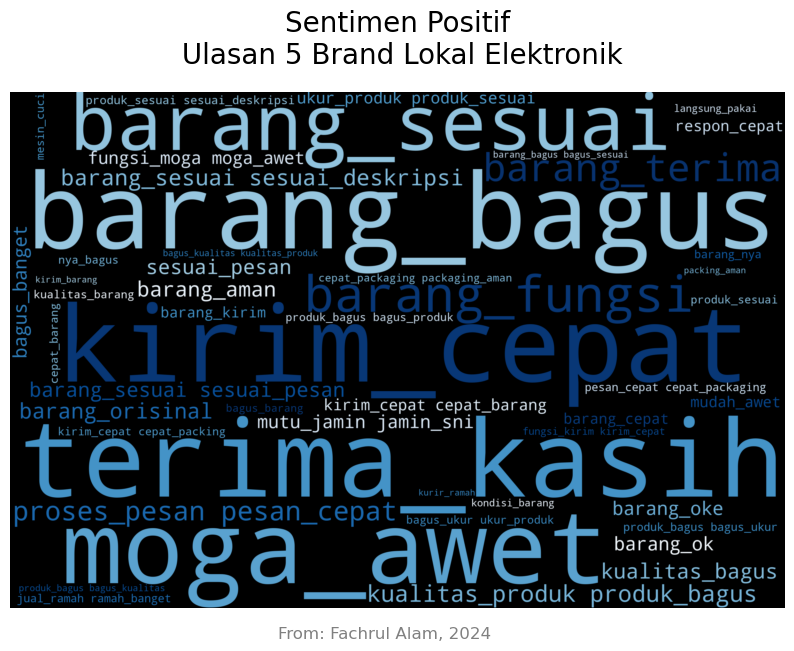

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud
wordcloud_trigram = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='Blues_r', max_words=50).generate(tweet_string)

# Plot word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_trigram, interpolation='bilinear')
plt.title("Sentimen Positif\n Ulasan 5 Brand Lokal Elektronik", fontsize=20, pad=20)  # Menambahkan jarak antara judul dan gambar menggunakan parameter 'pad'
plt.axis("off")

# Add caption below the plot
plt.figtext(0.5, 0.135, 'From: Fachrul Alam, 2024', ha='center', fontsize=12, color='gray')
plt.show()


## negatif 

In [11]:
# Drop unnecessary column
clean0 = df2[['text', 'Label']]
clean0 = clean0[clean0['Label']==0]

In [12]:
clean0['Label'].value_counts()

0    211
Name: Label, dtype: int64

In [13]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams0(text, n=1):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    return_val = []

    try:
        for grams in n_grams:
            return_val.append('_'.join(grams))
    except(RuntimeError):
        pass

    return ' '.join(return_val).strip()

In [14]:
import swifter
clean0['trigram_text'] = clean0['text'].apply(get_ngrams0, n=1)

In [15]:
tweet_string_list0 = clean0['trigram_text'].tolist()
tweet_string0 = ' '.join(tweet_string_list0)

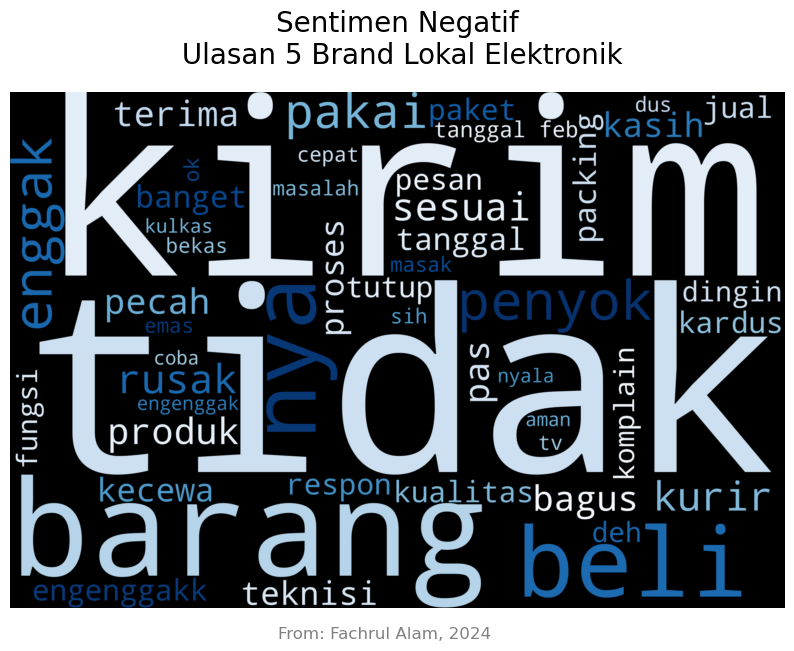

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud
wordcloud_trigram = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='Blues_r', max_words=50).generate(tweet_string0)

# Plot word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_trigram, interpolation='bilinear')
plt.title("Sentimen Negatif\n Ulasan 5 Brand Lokal Elektronik", fontsize=20, pad=20)  # Menambahkan jarak antara judul dan gambar menggunakan parameter 'pad'
plt.axis("off")

# Add caption below the plot
plt.figtext(0.5, 0.135, 'From: Fachrul Alam, 2024', ha='center', fontsize=12, color='gray')
plt.show()

# Import data yang sudah melalui preprocessing

In [1]:
import pandas as pd


df3 = pd.read_csv('preprocessing.csv')

In [2]:
df3.head()

,Tanggal,Produk,Rating,Label,Ulasan,Cleaning,Tokenizing,Normalisasi,Stopword,Stemming,text
0,Hari ini,POLYTRON Mesin Cuci 2 Tabung Giant Series Hija...,bintang 5,1,mantap,mantap,['mantap'],['mantap'],['mantap'],['mantap'],mantap
1,Hari ini,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,1,"barang original, penerimaan lumbayan cepat.",barang original penerimaan lumbayan cepat,"['barang', 'original', 'penerimaan', 'lumbayan...","['barang', 'original', 'penerimaan', 'lumbayan...","['barang', 'penerimaan', 'lumbayan', 'cepat']","['barang', 'terima', 'lumbayan', 'cepat']",barang terima lumbayan cepat
2,Hari ini,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,1,"very good respond, normal delivery, good qua...",very good respond normal delivery good quality,"['very', 'good', 'respond', 'normal', 'deliver...","['very', 'good', 'respond', 'normal', 'deliver...",[],[],sangat bagus respon baik
3,Hari ini,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,1,"barang ok, sistem pengirimannya yg perlu di p...",barang ok sistem pengirimannya yg perlu di per...,"['barang', 'ok', 'sistem', 'pengirimannya', 'y...","['barang', 'ok', 'sistem', 'pengirimannya', 'y...","['barang', 'ok', 'sistem', 'pengirimannya', 'p...","['barang', 'ok', 'sistem', 'kirim', 'perhati']",barang ok sistem kirim perhati
4,Hari ini,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,1,sudah sampai dan packing aman dan cepat . ong...,sudah sampai dan packing aman dan cepat ongkir...,"['sudah', 'sampai', 'dan', 'packing', 'aman', ...","['sudah', 'sampai', 'dan', 'packing', 'aman', ...","['packing', 'aman', 'cepat', 'ongkir', 'nya', ...","['packing', 'aman', 'cepat', 'ongkir', 'nya', ...",packing aman cepat ongkir nya mantap


In [3]:
df3.isnull().sum()

Tanggal        0
Produk         0
Rating         0
Label          0
Ulasan         0
Cleaning       0
Tokenizing     0
Normalisasi    0
Stopword       0
Stemming       0
text           0
dtype: int64

In [4]:
df3.dropna(inplace=True)

In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tanggal      1921 non-null   object
 1   Produk       1921 non-null   object
 2   Rating       1921 non-null   object
 3   Label        1921 non-null   int64 
 4   Ulasan       1921 non-null   object
 5   Cleaning     1921 non-null   object
 6   Tokenizing   1921 non-null   object
 7   Normalisasi  1921 non-null   object
 8   Stopword     1921 non-null   object
 9   Stemming     1921 non-null   object
 10  text         1921 non-null   object
dtypes: int64(1), object(10)
memory usage: 165.2+ KB


# Ekstraksi Fitur

### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

# Definisikan X dan y
X = df3['text']
y = df3['Label']

# Bagi data menjadi data latih dan data uji
# Dalam contoh di atas, stratify=y menjamin bahwa pembagian dilakukan secara proporsional terhadap kelas target y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Outputkan jumlah data latih dan data uji
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 1344
Jumlah data uji: 577


In [114]:
y_train.value_counts()

1    1196
0     148
Name: Label, dtype: int64

In [115]:
y_test.value_counts()

1    514
0     63
Name: Label, dtype: int64

## Metode Ekstraksi Fitur

### 1. Metode BoW dengan pencarian parameter terbaik menggunakan GridSearchCV

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier

# Inisialisasi pipeline dengan langkah-langkahnya
pipeline_bow = Pipeline([
    ('vect', CountVectorizer()),  # Langkah ekstraksi fitur dengan CountVectorizer
    ('clf', XGBClassifier())  # Langkah klasifikasi dengan XGBoost
])

# Definisikan grid parameter untuk ekstraksi fitur BoW
parameters_bow = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 500, 1000),
    'vect__min_df': (1, 2),
    'vect__stop_words': (None, 'english')
}

# Buat objek GridSearchCV untuk mencari parameter terbaik untuk ekstraksi fitur BoW
grid_search_bow = GridSearchCV(pipeline_bow, parameters_bow, n_jobs=-1, verbose=1)

# Lakukan pencarian parameter terbaik untuk ekstraksi fitur BoW
print("Mencari parameter terbaik untuk ekstraksi fitur BoW...")
grid_search_bow.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor evaluasi terbaik untuk ekstraksi fitur BoW
print("Parameter terbaik", grid_search_bow.best_params_)

Mencari parameter terbaik untuk ekstraksi fitur BoW...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Parameter terbaik untuk ekstraksi fitur BoW: {'vect__max_df': 0.5, 'vect__max_features': None, 'vect__min_df': 1, 'vect__stop_words': None}
Skor evaluasi terbaik untuk ekstraksi fitur BoW: 0.908466958885868


# Algoritma + ekstraksi fitur dan pencarian parameter terbaik

### BoW + XGBoost 

In [18]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

# Inisialisasi pipeline dengan langkah-langkahnya
pipeline_xgb = Pipeline([
    ('vect', CountVectorizer()),  # Langkah ekstraksi fitur dengan CountVectorizer
    ('clf', XGBClassifier())  # Langkah klasifikasi dengan XGBoost
])

# Definisikan grid parameter untuk model XGBoost + BoW
parameters_xgb = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 500, 1000),
    'vect__min_df': (1, 2),
    'vect__stop_words': (None, 'english'),
    'clf__n_estimators': (50, 100, 200),
    'clf__max_depth': (3, 5, 7)
}

# Buat objek GridSearchCV untuk mencari parameter terbaik untuk model XGBoost + BoW
model = GridSearchCV(pipeline_xgb, parameters_xgb, n_jobs=-1, verbose=1)

# Lakukan pencarian parameter terbaik untuk model XGBoost + BoW
print("Mencari parameter terbaik untuk model XGBoost + BoW...")
model.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor evaluasi terbaik untuk model XGBoost + BoW
print("Parameter terbaik:", model.best_params_)

Mencari parameter terbaik untuk model XGBoost + BoW...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Parameter terbaik: {'clf__max_depth': 5, 'clf__n_estimators': 50, 'vect__max_df': 0.5, 'vect__max_features': None, 'vect__min_df': 1, 'vect__stop_words': None}


# Evaluasi

In [19]:
# Membuat confusion matrix
# Prediksi menggunakan model terbaik
y_pred_bow = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_bow)
cm

array([[ 23,  40],
       [  9, 505]], dtype=int64)

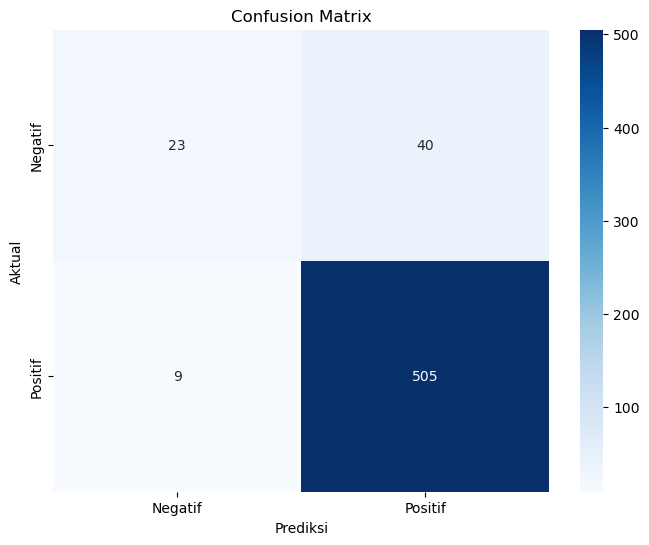

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Prediksi menggunakan model terbaik
y_pred_bow = model.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_bow)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Prediksi menggunakan model terbaik
y_pred_bow = model.predict(X_test)

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report

# Akurasi
accuracy = accuracy_score(y_test, y_pred_bow)
print("Akurasi:", accuracy)

# Laporan klasifikasi
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_bow))

Akurasi: 0.9150779896013865
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.72      0.37      0.48        63
           1       0.93      0.98      0.95       514

    accuracy                           0.92       577
   macro avg       0.82      0.67      0.72       577
weighted avg       0.90      0.92      0.90       577



## TF-IDF  + XGBoost

In [17]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi pipeline dengan langkah-langkahnya
pipeline_xgb = Pipeline([
    ('vect', TfidfVectorizer()),  # Langkah ekstraksi fitur dengan TfidfVectorizer
    ('clf', XGBClassifier())  # Langkah klasifikasi dengan XGBoost
])

# Definisikan grid parameter untuk model XGBoost + TF-IDF
parameters_tfidf = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 500, 1000),
    'vect__min_df': (1, 2),
    'vect__stop_words': (None, 'english'),
    'clf__n_estimators': (50, 100, 200),
    'clf__max_depth': (3, 5, 7)
}

# Buat objek GridSearchCV untuk mencari parameter terbaik untuk model XGBoost + TF-IDF
model_tfidf = GridSearchCV(pipeline_xgb, parameters_tfidf, n_jobs=-1, verbose=1)

# Lakukan pencarian parameter terbaik untuk model XGBoost + TF-IDF
print("Mencari parameter terbaik untuk model XGBoost + TF-IDF...")
model_tfidf.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor evaluasi terbaik untuk model XGBoost + TF-IDF
print("Parameter terbaik:" , model_tfidf.best_params_)
print("Skor evaluasi terbaik untuk model XGBoost + TF-IDF:", model_tfidf.best_score_)

Mencari parameter terbaik untuk model XGBoost + TF-IDF...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Parameter terbaik: {'clf__max_depth': 7, 'clf__n_estimators': 200, 'vect__max_df': 0.5, 'vect__max_features': 1000, 'vect__min_df': 1, 'vect__stop_words': None}
Skor evaluasi terbaik untuk model XGBoost + TF-IDF: 0.9099594961993009


## Evaluasi

In [54]:
# Prediksi menggunakan model terbaik
y_pred_tfidf = model_tfidf.predict(X_test)

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report

# Akurasi
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Akurasi:", accuracy_tfidf)

# Laporan klasifikasi
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_tfidf))

Akurasi: 0.9046793760831889
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.60      0.40      0.48        63
           1       0.93      0.97      0.95       514

    accuracy                           0.90       577
   macro avg       0.76      0.68      0.71       577
weighted avg       0.89      0.90      0.90       577



## Word2Vec + XGBoost

In [55]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from gensim.models import Word2Vec
from sklearn.base import TransformerMixin
import numpy as np

class Word2VecVectorizer(TransformerMixin):
    def __init__(self, size=100, window=5, min_count=1, sg=0):
        self.size = size
        self.window = window
        self.min_count = min_count
        self.sg = sg
        self.model = None

    def set_params(self, **params):
        self.size = params['size']
        self.window = params['window']
        self.min_count = params['min_count']
        self.sg = params['sg']
        return self

    def fit(self, X, y=None):
        self.model = Word2Vec(sentences=X, vector_size=self.size, window=self.window, min_count=self.min_count, sg=self.sg)
        return self

    def transform(self, X):
        X_vectors = []
        for sentence in X:
            vectors = []
            for word in sentence.split():
                if word in self.model.wv:
                    vectors.append(self.model.wv[word])
            if vectors:
                sentence_vector = np.mean(vectors, axis=0)
            else:
                sentence_vector = np.zeros(self.size)
            X_vectors.append(sentence_vector)
        return np.array(X_vectors)

# Inisialisasi pipeline dengan langkah-langkahnya
pipeline_word2vec = Pipeline([
    ('vect', Word2VecVectorizer()),  # Langkah ekstraksi fitur dengan Word2VecVectorizer
    ('clf', XGBClassifier())  # Langkah klasifikasi dengan XGBoost
])

# Definisikan grid parameter untuk model XGBoost + Word2Vec
parameters_word2vec = {
    'vect__size': [100, 200, 300],  # Ukuran vektor
    'vect__window': [5, 10],  # Ukuran jendela konteks
    'vect__min_count': [1, 5],  # Minimum frekuensi kata
    'vect__sg': [0, 1],  # Metode skip-gram (1) atau continuous bag of words (0)
    'clf__n_estimators': [50, 100, 200],  # Jumlah estimator
    'clf__max_depth': [3, 5, 7]  # Maksimum kedalaman pohon
}

# Buat objek GridSearchCV untuk mencari parameter terbaik untuk model XGBoost + Word2Vec
model_word2vec = GridSearchCV(pipeline_word2vec, parameters_word2vec, n_jobs=-1, verbose=1)

# Lakukan pencarian parameter terbaik untuk model XGBoost + Word2Vec
print("Mencari parameter terbaik untuk model XGBoost + Word2Vec...")
model_word2vec.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor evaluasi terbaik untuk model XGBoost + Word2Vec
print("Parameter terbaik untuk model XGBoost + Word2Vec:", model_word2vec.best_params_)
print("Skor evaluasi terbaik untuk model XGBoost + Word2Vec:", model_word2vec.best_score_)

Mencari parameter terbaik untuk model XGBoost + Word2Vec...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Parameter terbaik untuk model XGBoost + Word2Vec: {'clf__max_depth': 3, 'clf__n_estimators': 50, 'vect__min_count': 1, 'vect__sg': 0, 'vect__size': 100, 'vect__window': 5}
Skor evaluasi terbaik untuk model XGBoost + Word2Vec: 0.8898823725239972


## Evaluasi

In [56]:
# Prediksi menggunakan model terbaik
y_pred_word2vec = model_word2vec.predict(X_test)

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report

# Akurasi
accuracy_word2vec = accuracy_score(y_test, y_pred_word2vec)
print("Akurasi:", accuracy_word2vec)

# Laporan klasifikasi
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_word2vec))

Akurasi: 0.8908145580589255
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.89      1.00      0.94       514

    accuracy                           0.89       577
   macro avg       0.45      0.50      0.47       577
weighted avg       0.79      0.89      0.84       577



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Doc2Vec + XGBoost

In [57]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.base import TransformerMixin
import numpy as np

class Doc2VecVectorizer(TransformerMixin):
    def __init__(self, vector_size=100, window=5, min_count=1, epochs=10):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.epochs = epochs
        self.model = None

    def set_params(self, **params):
        self.vector_size = params['vector_size']
        self.window = params['window']
        self.min_count = params['min_count']
        self.epochs = params['epochs']
        return self

    def fit(self, X, y=None):
        tagged_documents = [TaggedDocument(words=sentence.split(), tags=[i]) for i, sentence in enumerate(X)]
        self.model = Doc2Vec(vector_size=self.vector_size, window=self.window, min_count=self.min_count, epochs=self.epochs)
        self.model.build_vocab(tagged_documents)
        self.model.train(tagged_documents, total_examples=self.model.corpus_count, epochs=self.model.epochs)
        return self

    def transform(self, X):
        X_vectors = []
        for sentence in X:
            vector = self.model.infer_vector(sentence.split())
            X_vectors.append(vector)
        return np.array(X_vectors)

# Inisialisasi pipeline dengan langkah-langkahnya
pipeline_doc2vec = Pipeline([
    ('vect', Doc2VecVectorizer()),  # Langkah ekstraksi fitur dengan Doc2VecVectorizer
    ('clf', XGBClassifier())  # Langkah klasifikasi dengan XGBoost
])

# Definisikan grid parameter untuk model XGBoost + Doc2Vec
parameters_doc2vec = {
    'vect__vector_size': [100, 200, 300],  # Ukuran vektor
    'vect__window': [5, 10],  # Ukuran jendela konteks
    'vect__min_count': [1, 5],  # Minimum frekuensi kata
    'vect__epochs': [10, 20],  # Jumlah iterasi pembelajaran
    'clf__n_estimators': [50, 100, 200],  # Jumlah estimator
    'clf__max_depth': [3, 5, 7]  # Maksimum kedalaman pohon
}

# Buat objek GridSearchCV untuk mencari parameter terbaik untuk model XGBoost + Doc2Vec
model_doc2vec = GridSearchCV(pipeline_doc2vec, parameters_doc2vec, n_jobs=-1, verbose=1)

# Lakukan pencarian parameter terbaik untuk model XGBoost + Doc2Vec
print("Mencari parameter terbaik untuk model XGBoost + Doc2Vec...")
model_doc2vec.fit(X_train, y_train)
 
# Tampilkan parameter terbaik dan skor evaluasi terbaik untuk model XGBoost + Doc2Vec
print("Parameter terbaik untuk model XGBoost + Doc2Vec:", model_doc2vec.best_params_)
print("Skor evaluasi terbaik untuk model XGBoost + Doc2Vec:", model_doc2vec.best_score_)

Mencari parameter terbaik untuk model XGBoost + Doc2Vec...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Parameter terbaik untuk model XGBoost + Doc2Vec: {'clf__max_depth': 7, 'clf__n_estimators': 50, 'vect__epochs': 20, 'vect__min_count': 1, 'vect__vector_size': 300, 'vect__window': 10}
Skor evaluasi terbaik untuk model XGBoost + Doc2Vec: 0.8958275536814071


## Evaluasi

In [58]:
# Prediksi menggunakan model terbaik
y_pred_doc2vec = model_doc2vec.predict(X_test)

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report

# Akurasi 
accuracy_doc2vec = accuracy_score(y_test, y_pred_doc2vec)
print("Akurasi:", accuracy_doc2vec)

# Laporan klasifikasi
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_doc2vec))

Akurasi: 0.8908145580589255
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.50      0.08      0.14        63
           1       0.90      0.99      0.94       514

    accuracy                           0.89       577
   macro avg       0.70      0.53      0.54       577
weighted avg       0.85      0.89      0.85       577



In [ ]:
#X_train, X_test, y_train, y_test

In [66]:
y_train.value_counts()

1    1196
0     148
Name: Label, dtype: int64

In [67]:
y_test.value_counts()

1    514
0     63
Name: Label, dtype: int64

# BoW + SVM

In [68]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi pipeline dengan langkah-langkahnya
pipeline_svm = Pipeline([
    ('vect', CountVectorizer()),  # Langkah ekstraksi fitur dengan CountVectorizer
    ('clf', SVC())  # Langkah klasifikasi dengan SVM
])

# Definisikan grid parameter untuk model SVM + BoW
parameters_svm = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 500, 1000),
    'vect__min_df': (1, 2),
    'vect__stop_words': (None, 'english'),
    'clf__C': [0.1, 1, 10, 100],  # Parameter regulasi untuk SVM
    'clf__kernel': ['linear', 'rbf']  # Jenis kernel untuk SVM
}

# Buat objek GridSearchCV untuk mencari parameter terbaik untuk model SVM + BoW
model_svm = GridSearchCV(pipeline_svm, parameters_svm, n_jobs=-1, verbose=1)

# Lakukan pencarian parameter terbaik untuk model SVM + BoW
print("Mencari parameter terbaik untuk model SVM + BoW...")
model_svm.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor evaluasi terbaik untuk model SVM + BoW
print("Parameter terbaik untuk model SVM + BoW:", model_svm.best_params_)
print("Skor evaluasi terbaik untuk model SVM + BoW:", model_svm.best_score_)

Mencari parameter terbaik untuk model SVM + BoW...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Parameter terbaik untuk model SVM + BoW: {'clf__C': 1, 'clf__kernel': 'linear', 'vect__max_df': 0.5, 'vect__max_features': None, 'vect__min_df': 1, 'vect__stop_words': None}
Skor evaluasi terbaik untuk model SVM + BoW: 0.9144176885091271


# Evaluasi

In [69]:
# Prediksi menggunakan model terbaik
y_pred_svm = model_svm.predict(X_test)

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report

# Akurasi 
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Akurasi:", accuracy_svm)

# Laporan klasifikasi
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_svm))

Akurasi: 0.9220103986135182
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.72      0.46      0.56        63
           1       0.94      0.98      0.96       514

    accuracy                           0.92       577
   macro avg       0.83      0.72      0.76       577
weighted avg       0.91      0.92      0.91       577



# BoW + Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi pipeline dengan langkah-langkahnya
pipeline_nb = Pipeline([
    ('vect', CountVectorizer()),  # Langkah ekstraksi fitur dengan CountVectorizer
    ('clf', MultinomialNB())  # Langkah klasifikasi dengan Naive Bayes
])

# Definisikan grid parameter untuk model Naive Bayes + BoW
parameters_nb = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 500, 1000),
    'vect__min_df': (1, 2),
    'vect__stop_words': (None, 'english'),
    'clf__alpha': (0.1, 0.5, 1.0)  # Parameter alpha untuk Naive Bayes
}

# Buat objek GridSearchCV untuk mencari parameter terbaik untuk model Naive Bayes + BoW
model_nb = GridSearchCV(pipeline_nb, parameters_nb, n_jobs=-1, verbose=1)

# Lakukan pencarian parameter terbaik untuk model Naive Bayes + BoW
print("Mencari parameter terbaik untuk model Naive Bayes + BoW...")
model_nb.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor evaluasi terbaik untuk model Naive Bayes + BoW
print("Parameter terbaik untuk model Naive Bayes + BoW:", model_nb.best_params_)
print("Skor evaluasi terbaik untuk model Naive Bayes + BoW:", model_nb.best_score_)

Mencari parameter terbaik untuk model Naive Bayes + BoW...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Parameter terbaik untuk model Naive Bayes + BoW: {'clf__alpha': 0.5, 'vect__max_df': 0.5, 'vect__max_features': None, 'vect__min_df': 2, 'vect__stop_words': None}
Skor evaluasi terbaik untuk model Naive Bayes + BoW: 0.9188786550518783


In [14]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
cm

array([[ 37,  26],
       [ 16, 498]], dtype=int64)

# Evaluasi

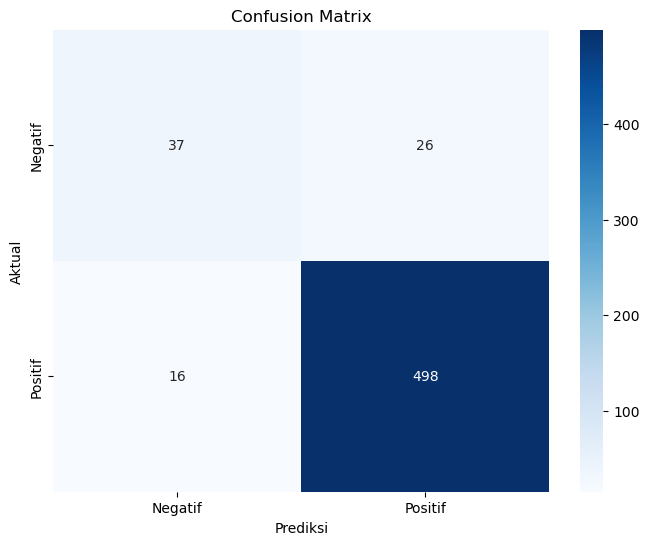

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Prediksi menggunakan model terbaik
y_pred_nb = model_nb.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [71]:
# Prediksi menggunakan model terbaik
y_pred_nb = model_nb.predict(X_test)

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report

# Akurasi 
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Akurasi:", accuracy_nb)

# Laporan klasifikasi
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_nb))

Akurasi: 0.9272097053726169
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.70      0.59      0.64        63
           1       0.95      0.97      0.96       514

    accuracy                           0.93       577
   macro avg       0.82      0.78      0.80       577
weighted avg       0.92      0.93      0.92       577



# BoW + Regresi Logistic

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi pipeline dengan langkah-langkahnya
pipeline_lr = Pipeline([
    ('vect', CountVectorizer()),  # Langkah ekstraksi fitur dengan CountVectorizer
    ('clf', LogisticRegression(max_iter=1000))  # Langkah klasifikasi dengan Regresi Logistik
])

# Definisikan grid parameter untuk model Regresi Logistik + BoW
parameters_lr = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 500, 1000),
    'vect__min_df': (1, 2),
    'vect__stop_words': (None, 'english'),
    'clf__C': [0.1, 1, 10, 100]  # Parameter regulasi untuk Regresi Logistik
}

# Buat objek GridSearchCV untuk mencari parameter terbaik untuk model Regresi Logistik + BoW
model_lr = GridSearchCV(pipeline_lr, parameters_lr, n_jobs=-1, verbose=1)

# Lakukan pencarian parameter terbaik untuk model Regresi Logistik + BoW
print("Mencari parameter terbaik untuk model Regresi Logistik + BoW...")
model_lr.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor evaluasi terbaik untuk model Regresi Logistik + BoW
print("Parameter terbaik untuk model Regresi Logistik + BoW:", model_lr.best_params_)
print("Skor evaluasi terbaik untuk model Regresi Logistik + BoW:", model_lr.best_score_)

Mencari parameter terbaik untuk model Regresi Logistik + BoW...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Parameter terbaik untuk model Regresi Logistik + BoW: {'clf__C': 1, 'vect__max_df': 0.5, 'vect__max_features': None, 'vect__min_df': 2, 'vect__stop_words': None}
Skor evaluasi terbaik untuk model Regresi Logistik + BoW: 0.9188786550518782


# Evaluasi

In [73]:
# Prediksi menggunakan model terbaik
y_pred_lr = model_lr.predict(X_test)

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report

# Akurasi 
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Akurasi:", accuracy_lr)

# Laporan klasifikasi
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_lr))

Akurasi: 0.925476603119584
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.38      0.53        63
           1       0.93      0.99      0.96       514

    accuracy                           0.93       577
   macro avg       0.89      0.69      0.74       577
weighted avg       0.92      0.93      0.91       577



# BoW + Dicision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi pipeline dengan langkah-langkahnya
pipeline_dt = Pipeline([
    ('vect', CountVectorizer()),  # Langkah ekstraksi fitur dengan CountVectorizer
    ('clf', DecisionTreeClassifier())  # Langkah klasifikasi dengan Decision Tree
])

# Definisikan grid parameter untuk model Decision Tree + BoW
parameters_dt = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 500, 1000),
    'vect__min_df': (1, 2),
    'vect__stop_words': (None, 'english'),
    'clf__max_depth': [None, 10, 20, 30]  # Parameter kedalaman pohon untuk Decision Tree
}

# Buat objek GridSearchCV untuk mencari parameter terbaik untuk model Decision Tree + BoW
model_dt = GridSearchCV(pipeline_dt, parameters_dt, n_jobs=-1, verbose=1)

# Lakukan pencarian parameter terbaik untuk model Decision Tree + BoW
print("Mencari parameter terbaik untuk model Decision Tree + BoW...")
model_dt.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor evaluasi terbaik untuk model Decision Tree + BoW
print("Parameter terbaik untuk model Decision Tree + BoW:", model_dt.best_params_)
print("Skor evaluasi terbaik untuk model Decision Tree + BoW:", model_dt.best_score_)

Mencari parameter terbaik untuk model Decision Tree + BoW...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Parameter terbaik untuk model Decision Tree + BoW: {'clf__max_depth': 20, 'vect__max_df': 1.0, 'vect__max_features': 500, 'vect__min_df': 2, 'vect__stop_words': None}
Skor evaluasi terbaik untuk model Decision Tree + BoW: 0.8973145425289907


# Evaluasi

In [75]:
# Prediksi menggunakan model terbaik
y_pred_dt = model_dt.predict(X_test)

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report

# Akurasi 
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Akurasi:", accuracy_dt)

# Laporan klasifikasi
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_dt))

Akurasi: 0.8994800693240901
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.56      0.40      0.46        63
           1       0.93      0.96      0.94       514

    accuracy                           0.90       577
   macro avg       0.74      0.68      0.70       577
weighted avg       0.89      0.90      0.89       577



# BoW + KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi pipeline dengan langkah-langkahnya
pipeline_knn = Pipeline([
    ('vect', CountVectorizer()),  # Langkah ekstraksi fitur dengan CountVectorizer
    ('clf', KNeighborsClassifier())  # Langkah klasifikasi dengan KNN
])

# Definisikan grid parameter untuk model KNN + BoW
parameters_knn = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 500, 1000),
    'vect__min_df': (1, 2),
    'vect__stop_words': (None, 'english'),
    'clf__n_neighbors': [3, 5, 7, 9]  # Parameter jumlah tetangga terdekat untuk KNN
}

# Buat objek GridSearchCV untuk mencari parameter terbaik untuk model KNN + BoW
model_knn = GridSearchCV(pipeline_knn, parameters_knn, n_jobs=-1, verbose=1)

# Lakukan pencarian parameter terbaik untuk model KNN + BoW
print("Mencari parameter terbaik untuk model KNN + BoW...")
model_knn.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor evaluasi terbaik untuk model KNN + BoW
print("Parameter terbaik untuk model KNN + BoW:", model_knn.best_params_)
print("Skor evaluasi terbaik untuk model KNN + BoW:", model_knn.best_score_)

Mencari parameter terbaik untuk model KNN + BoW...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Parameter terbaik untuk model KNN + BoW: {'clf__n_neighbors': 3, 'vect__max_df': 0.5, 'vect__max_features': None, 'vect__min_df': 1, 'vect__stop_words': None}
Skor evaluasi terbaik untuk model KNN + BoW: 0.9002968429229318


# Evaluasi

In [77]:
# Prediksi menggunakan model terbaik
y_pred_knn = model_knn.predict(X_test)

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report

# Akurasi 
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Akurasi:", accuracy_knn)

# Laporan klasifikasi
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_knn))

Akurasi: 0.9150779896013865
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.85      0.27      0.41        63
           1       0.92      0.99      0.95       514

    accuracy                           0.92       577
   macro avg       0.88      0.63      0.68       577
weighted avg       0.91      0.92      0.89       577



# Rangkuman

In [22]:
from sklearn.metrics import classification_report

# Prediksi menggunakan model XGBoost
y_pred_bow = model.predict(X_test)
print("Laporan Klasifikasi XGBoost:\n", classification_report(y_test, y_pred_bow))
print("------------------------------------------------")

# Prediksi menggunakan model Naive Bayes
y_pred_nb = model_nb.predict(X_test)
print("Laporan Klasifikasi Naive Bayes:\n", classification_report(y_test, y_pred_nb))
print("------------------------------------------------")

Laporan Klasifikasi XGBoost:
               precision    recall  f1-score   support

           0       0.72      0.37      0.48        63
           1       0.93      0.98      0.95       514

    accuracy                           0.92       577
   macro avg       0.82      0.67      0.72       577
weighted avg       0.90      0.92      0.90       577

------------------------------------------------
Laporan Klasifikasi Naive Bayes:
               precision    recall  f1-score   support

           0       0.70      0.59      0.64        63
           1       0.95      0.97      0.96       514

    accuracy                           0.93       577
   macro avg       0.82      0.78      0.80       577
weighted avg       0.92      0.93      0.92       577

------------------------------------------------


In [78]:
from sklearn.metrics import classification_report

# Prediksi menggunakan model XGBoost
y_pred_bow = model.predict(X_test)
print("Laporan Klasifikasi XGBoost:\n", classification_report(y_test, y_pred_bow))
print("------------------------------------------------")

# Prediksi menggunakan model SVM
y_pred_svm = model_svm.predict(X_test)
print("Laporan Klasifikasi SVM:\n", classification_report(y_test, y_pred_svm))
print("------------------------------------------------")

# Prediksi menggunakan model Naive Bayes
y_pred_nb = model_nb.predict(X_test)
print("Laporan Klasifikasi Naive Bayes:\n", classification_report(y_test, y_pred_nb))
print("------------------------------------------------")

# Prediksi menggunakan model KNN
y_pred_knn = model_knn.predict(X_test)
print("Laporan Klasifikasi KNN:\n", classification_report(y_test, y_pred_knn))
print("------------------------------------------------")

# Prediksi menggunakan model Decision Tree
y_pred_dt = model_dt.predict(X_test)
print("Laporan Klasifikasi Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("------------------------------------------------")

# Prediksi menggunakan model Logistic Regression
y_pred_lr = model_lr.predict(X_test)
print("Laporan Klasifikasi Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("------------------------------------------------")

Laporan Klasifikasi XGBoost:
               precision    recall  f1-score   support

           0       0.72      0.37      0.48        63
           1       0.93      0.98      0.95       514

    accuracy                           0.92       577
   macro avg       0.82      0.67      0.72       577
weighted avg       0.90      0.92      0.90       577

------------------------------------------------
Laporan Klasifikasi SVM:
               precision    recall  f1-score   support

           0       0.72      0.46      0.56        63
           1       0.94      0.98      0.96       514

    accuracy                           0.92       577
   macro avg       0.83      0.72      0.76       577
weighted avg       0.91      0.92      0.91       577

------------------------------------------------
Laporan Klasifikasi Naive Bayes:
               precision    recall  f1-score   support

           0       0.70      0.59      0.64        63
           1       0.95      0.97      0.96      

In [87]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [88]:
df2.head()

,Tanggal,Produk,Rating,Label,Ulasan,Cleaning,Tokenizing,Normalisasi,Stopword,Stemming,text
0,Hari ini,POLYTRON Mesin Cuci 2 Tabung Giant Series Hija...,bintang 5,1,mantap,mantap,['mantap'],['mantap'],['mantap'],['mantap'],mantap
1,Hari ini,"POLYTRON SMART DIGITAL TV 32"" PLD 32CV1869",bintang 5,1,"barang original, penerimaan lumbayan cepat.",barang original penerimaan lumbayan cepat,"['barang', 'original', 'penerimaan', 'lumbayan...","['barang', 'original', 'penerimaan', 'lumbayan...","['barang', 'penerimaan', 'lumbayan', 'cepat']","['barang', 'terima', 'lumbayan', 'cepat']",barang terima lumbayan cepat
2,Hari ini,POLYTRON Kulkas 1 Pintu Belleza 180 Liter PRA 18J,bintang 5,1,"very good respond, normal delivery, good qua...",very good respond normal delivery good quality,"['very', 'good', 'respond', 'normal', 'deliver...","['very', 'good', 'respond', 'normal', 'deliver...",[],[],sangat bagus respon baik
3,Hari ini,POLYTRON Professional Active Speaker PAS PRO12F6,bintang 5,1,"barang ok, sistem pengirimannya yg perlu di p...",barang ok sistem pengirimannya yg perlu di per...,"['barang', 'ok', 'sistem', 'pengirimannya', 'y...","['barang', 'ok', 'sistem', 'pengirimannya', 'y...","['barang', 'ok', 'sistem', 'pengirimannya', 'p...","['barang', 'ok', 'sistem', 'kirim', 'perhati']",barang ok sistem kirim perhati
4,Hari ini,POLYTRON Bluetooth Speaker PMA 9321 /B,bintang 5,1,sudah sampai dan packing aman dan cepat . ong...,sudah sampai dan packing aman dan cepat ongkir...,"['sudah', 'sampai', 'dan', 'packing', 'aman', ...","['sudah', 'sampai', 'dan', 'packing', 'aman', ...","['packing', 'aman', 'cepat', 'ongkir', 'nya', ...","['packing', 'aman', 'cepat', 'ongkir', 'nya', ...",packing aman cepat ongkir nya mantap


In [89]:
Ulasan =df2['text']

In [92]:
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

1807


In [93]:
term_fit.vocabulary_

{'mantap': 1003,
 'barang': 149,
 'terima': 1669,
 'lumbayan': 952,
 'cepat': 309,
 'sangat': 1446,
 'bagus': 107,
 'respon': 1387,
 'baik': 118,
 'ok': 1171,
 'sistem': 1535,
 'kirim': 815,
 'perhati': 1276,
 'packing': 1205,
 'aman': 48,
 'ongkir': 1182,
 'nya': 1151,
 'kurir': 873,
 'pilih': 1286,
 'pakai': 1212,
 'jasa': 680,
 'kgx': 806,
 'tanggal': 1622,
 'pagi': 1210,
 'proses': 1326,
 'serah': 1503,
 'upaya': 1758,
 'kom': 825,
 'sesuai': 1513,
 'spesifikasi': 1561,
 'pesan': 1280,
 'awet': 98,
 'belikan': 191,
 'orang': 1189,
 'tua': 1726,
 'moga': 1076,
 'heppy': 603,
 'mesti': 1050,
 'kendala': 788,
 'lebih': 906,
 'genap': 536,
 'mesin': 1049,
 'cuci': 334,
 'eror': 484,
 'lapor': 900,
 'centre': 307,
 'tidak': 1686,
 'kunjung': 870,
 'teknisi': 1642,
 'caseskm': 298,
 'garansi': 526,
 'paket': 1214,
 'kondisi': 839,
 'coba': 317,
 'fungsi': 507,
 'masak': 1016,
 'hasil': 589,
 'gantung': 524,
 'beras': 203,
 'beli': 190,
 'suara': 1579,
 'atur': 91,
 'trebel': 1720,
 'aux'

In [96]:
# kolom pertama ini berarti jumlah dokumen, koilom kedua = letak katanya, kolom ketiga = hasil tf

term_frequency_all = term_fit.transform(Ulasan)
print(term_frequency_all)

  (0, 1003)	1
  (1, 149)	1
  (1, 309)	1
  (1, 952)	1
  (1, 1669)	1
  (2, 107)	1
  (2, 118)	1
  (2, 1387)	1
  (2, 1446)	1
  (3, 149)	1
  (3, 815)	1
  (3, 1171)	1
  (3, 1276)	1
  (3, 1535)	1
  (4, 48)	1
  (4, 309)	1
  (4, 1003)	1
  (4, 1151)	1
  (4, 1182)	1
  (4, 1205)	1
  (5, 680)	1
  (5, 806)	2
  (5, 815)	1
  (5, 825)	1
  (5, 873)	3
  :	:
  (1915, 815)	1
  (1915, 862)	1
  (1915, 1205)	1
  (1915, 1280)	1
  (1915, 1513)	1
  (1915, 1669)	1
  (1916, 507)	1
  (1916, 747)	1
  (1916, 1212)	2
  (1917, 42)	1
  (1918, 330)	1
  (1918, 1086)	1
  (1919, 149)	1
  (1919, 190)	1
  (1919, 507)	2
  (1919, 1016)	1
  (1919, 1151)	1
  (1919, 1205)	1
  (1919, 1669)	1
  (1919, 1686)	1
  (1920, 98)	1
  (1920, 149)	1
  (1920, 1076)	1
  (1920, 1212)	1
  (1920, 1513)	1


In [108]:
dokumen = term_fit.transform(Ulasan)
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

tfidf = tfidf_transformer.transform(term_frequency_all)
print(tfidf)

[7.86797441 7.86797441 7.86797441 ... 7.86797441 7.86797441 7.86797441]
  (0, 1003)	1.0
  (1, 1669)	0.35966909644625356
  (1, 952)	0.8619741921404471
  (1, 309)	0.285990452180764
  (1, 149)	0.2141216813094857
  (2, 1446)	0.7313782713223465
  (2, 1387)	0.3734825600622601
  (2, 118)	0.517338339651167
  (2, 107)	0.24074393843636022
  (3, 1535)	0.6571062488708689
  (3, 1276)	0.593624393596414
  (3, 1171)	0.3660443229612853
  (3, 815)	0.22314108958218598
  (3, 149)	0.17900018097765907
  (4, 1205)	0.3881326273259338
  (4, 1182)	0.6385059239052048
  (4, 1151)	0.36244477626798793
  (4, 1003)	0.35932636226426334
  (4, 309)	0.2743165516440496
  (4, 48)	0.3254720076675192
  (5, 1758)	0.27337889740697746
  (5, 1622)	0.3940692371026189
  (5, 1503)	0.25929069650164205
  (5, 1326)	0.14434794429666625
  (5, 1286)	0.19902063214780535
  :	:
  (1915, 862)	0.3064590414161849
  (1915, 815)	0.20950828112282255
  (1915, 755)	0.31629713869742376
  (1915, 652)	0.5977723132535584
  (1915, 309)	0.224473978549163

In [110]:
from sklearn.model_selection import train_test_split

# Definisikan X dan y
X = df3['text']
y = df3['Label']

# Bagi data menjadi data latih dan data uji
# Dalam contoh di atas, stratify=y menjamin bahwa pembagian dilakukan secara proporsional terhadap kelas target y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Outputkan jumlah data latih dan data uji
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 1344
Jumlah data uji: 577
